In [1]:
# Numpy library to use matrices
import numpy as np

# Load display library for jupyter notebook
import matplotlib
from matplotlib import pyplot as plt


In [2]:
# We'll continue onwards with our canvas function
N = 100

def show_canvas(canvas, title=""):
    # Similar to doing cv2.imshow, but in this environment
    plt.figure()
    plt.imshow(canvas, cmap="gray", norm=matplotlib.colors.NoNorm()) 
    plt.title(title)
    
def reset_canvas(size):
    return np.ones((size,size))
    


In [3]:
# Draw all eight combinations (moved with origin)
def draw8(canvas, x, y, x0, y0):
    canvas[(N - 1) - (y + y0), (x + x0)] = 0
    canvas[(N - 1) - (y + y0), (-x + x0)] = 0
    canvas[(N - 1) - (-y + y0), (x + x0)] = 0
    canvas[(N - 1) - (-y + y0), (-x + x0)] = 0
    canvas[(N - 1) - (x + y0), (y + x0)] = 0
    canvas[(N - 1) - (x + y0), (-y + x0)] = 0
    canvas[(N - 1) - (-x + y0), (y + x0)] = 0
    canvas[(N - 1) - (-x + y0), (-y + x0)] = 0
    return canvas

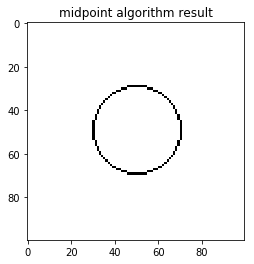

In [4]:
# Midpoint algorithm
x0 = 50
y0 = 50
R = 20
canvas = reset_canvas(N)
# init
d = 5/4 - R
x_s = 0
x_e = int(np.round(1/np.sqrt(2) * R))
y = R
for x in range(x_s, x_e + 1):
    canvas = draw8(canvas, x, y, x0, y0)
    if d < 0:
        # midpoint in circle, choose E
        delta = 2 * x + 3
        y = y
    else:
        # midpoint outside circle, choose SE
        delta = 2 * x - 2 * y + 5
        y = y - 1
    d += delta
show_canvas(canvas, "midpoint algorithm result")

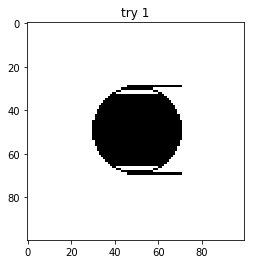

In [5]:
# Continuing onwards, Let's try to fill this circle

# Since we know that the circle extends only up R, we'll loop though there
new_canvas = canvas.copy() # we'll make a copy because we don't want to redo the drawing above
for y in range(-R, R + 1):
    # We'll have a counter that records even/odd
    is_odd = False
    for x in range(-R, R + 1):
        j = (N - 1) - (y + y0)
        i = x + x0
        if new_canvas[j, i] == 0:
            is_odd = not is_odd
        if is_odd:
            new_canvas[j, i] = 0
show_canvas(new_canvas, "try 1")
            

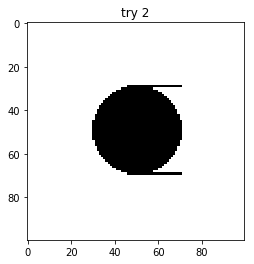

In [14]:
# Okay, we'll fix that. Let's just detect "crossings"

# Since we know that the circle extends only up R, we'll loop though there
new_canvas = canvas.copy() # we'll make a copy because we don't want to redo the drawing above
for y in range(-R, R + 1):
    # We'll have a counter that records even/odd
    is_odd = False
    for x in range(-R, R + 1):
        j = (N - 1) - (y + y0)
        i = x + x0
        if canvas[j, i] == 0 and canvas[j, i + 1] != 0:
            is_odd = not is_odd
        if is_odd:
            new_canvas[j, i] = 0
show_canvas(new_canvas, "try 2")

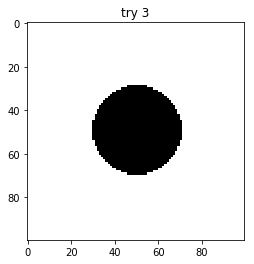

In [41]:
# Okay, we'll fix that again, let's draw a line, when ever we find two crossings
def draw_line(canvas, xs, xe, yy):
    for xx in range(xs, xe + 1):
        canvas[yy, xx] = 0
    return canvas

# Since we know that the circle extends only up R, we'll loop though there
new_canvas = canvas.copy() # we'll make a copy because we don't want to redo the drawing above
for y in range(-R, R + 1):
    # We'll have a counter that records even/odd
    xs = None
    is_odd = False
    for x in range(-R, R + 1):
        j = (N - 1) - (y + y0)
        i = x + x0
        if canvas[j, i] == 0 and canvas[j, i + 1] != 0:
            if not is_odd:
                xs = i
            else:
                new_canvas = draw_line(new_canvas, xs, i, j)
            is_odd = not is_odd

show_canvas(new_canvas, "try 3")

In [ ]:
# Yay it works